Seeding for Reproducibility

In [ ]:
#set seeds for reproducibility

import random
import numpy as np
import tensorflow as tf

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

Importing the dependencies

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Data Curation

In [ ]:
#load and prepare the fashion MNIST dataset

fashion_data = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Data Preprocessing

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
print(train_images[0].shape)  #gray scale images

(28, 28)


In [ ]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


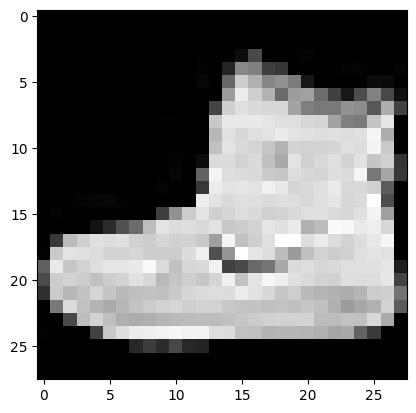

In [ ]:
#diaplaying the image from the dataset

plt.imshow(train_images[0],cmap='gray')
plt.show()

In [ ]:
print(train_labels[0])

9


In [ ]:
#checking unique values in train labels

np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0 --> T-shirt,

1 --> Trouser,

2 --> Pullover,

3 --> Dress,

4 --> Coat,

5 --> Sandal,

6 --> Shirt,

7 --> Sneaker,

8 --> Bag,

9 --> Ankle boot

In [ ]:
#Normalizing the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.

In [ ]:
#reshape images to specify that its a signal channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [ ]:
print(train_images.shape,test_images.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


CNN

In [ ]:
# build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
#Compiling the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Model Training

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4907 - accuracy: 0.8210 - val_loss: 0.3626 - val_accuracy: 0.8695
Epoch 2/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3189 - accuracy: 0.8832 - val_loss: 0.3146 - val_accuracy: 0.8878
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2716 - accuracy: 0.8998 - val_loss: 0.2879 - val_accuracy: 0.8974
Epoch 4/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2415 - accuracy: 0.9100 - val_loss: 0.2782 - val_accuracy: 0.8973
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2177 - accuracy: 0.9190 - val_loss: 0.2720 - val_accuracy: 0.9016
Epoch 6/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1958 - accuracy: 0.9273 - val_loss: 0.2583 - val_accuracy: 0.9074
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1803 - accuracy: 0.9336 - val_loss: 0.2770 -

Model Evaluation

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 2s - loss: 0.2693 - accuracy: 0.9083 - 2s/epoch - 8ms/step

Test Accuracy: 0.90829998254776


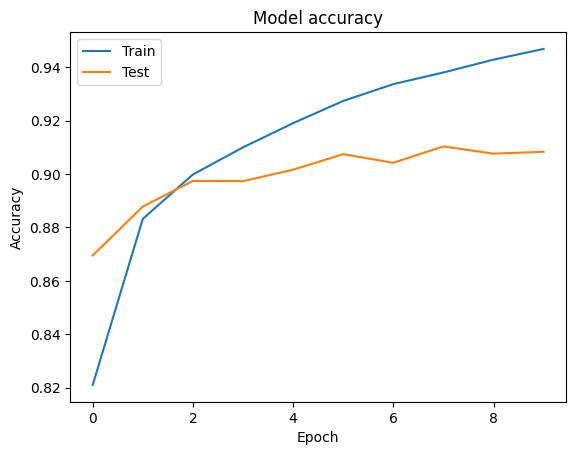

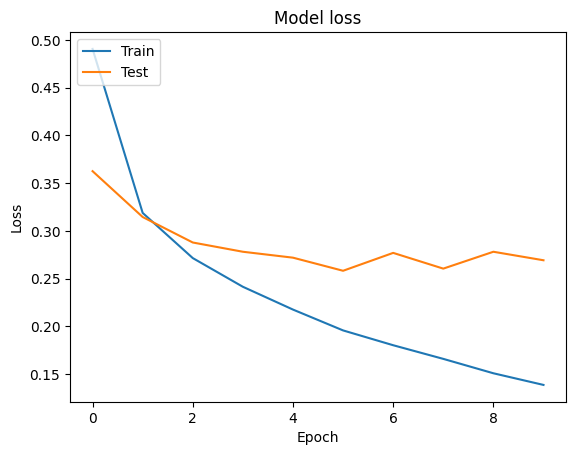

In [ ]:
#Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('trained_model_fashion_mnist.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Making A Predictive System

Path of the image to be predicted : /content/download (4).jpeg


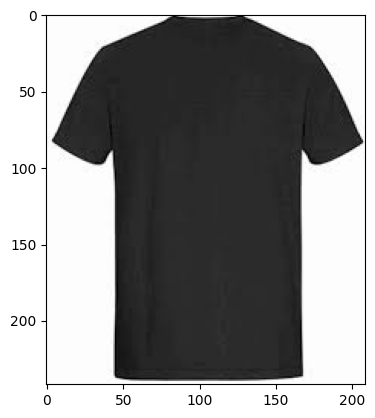

1/1 [==============================] - 0s 22ms/step
[[  3.147254    -9.141776     6.6316533   -9.670377    -0.99925935
  -15.606732     5.9577026  -16.34263     -3.9290624  -12.332949  ]]
2
The image is of Pullover


In [ ]:
from PIL import Image
input_img_path = input('Path of the image to be predicted : ')
image = Image.open(input_img_path)
plt.imshow(image,cmap='gray')
plt.show()
img = image.resize((28, 28))
img = img.convert('L')  # Convert to grayscale
img_array = np.array(img) / 255.0
img_array = img_array.reshape((1, 28, 28, 1))

input_prediction = model.predict(img_array)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print("The image is of T-shirt")
elif input_pred_label == 1:
  print("The image is of Trouser")
elif input_pred_label == 2:
  print("The image is of Pullover")
elif input_pred_label == 3:
  print("The image is of Dress")
elif input_pred_label == 4:
  print("The image is of Coat")
elif input_pred_label == 5:
  print("The image is of Sandal")
elif input_pred_label == 6:
  print("The image is of Shirt")
elif input_pred_label == 7:
  print("The image is of Sneaker")
elif input_pred_label == 8:
  print("The image is of Bag")
elif input_pred_label == 9:
  print("The image is of Ankle boot")